<h2 style='text-align:center;'><b> CAPSTONE PROJECT III - TELCO CUSTOMER CHURN</b></h1>

<h5 style="text-align: center;">RAFI ARYA ANINDYA JCDS 2604 - 012</h2>

---

## 1. BUSINESS UNDERSTANDING

### BUSINESS CONTEXT

Dalam industri telekomunikasi, churn terjadi ketika pelanggan berhenti menggunakan layanan seperti internet atau telepon, yang menyebabkan penurunan pendapatan dan peningkatan biaya untuk mendapatkan pelanggan baru. Dengan persaingan yang ketat, memahami dan memprediksi churn sangat penting untuk mempertahankan pelanggan dan menjaga profitabilitas bisnis.

### TARGET

1 : Churn

0 : Not Churn

### PROBLEM STATEMENT


Memperoleh pelanggan baru jauh lebih mahal daripada mempertahankan pelanggan yang sudah ada. Biaya untuk mengakuisisi pelanggan baru bisa mencapai lima kali lipat lebih mahal daripada mempertahankan pelanggan yang sudah ada. Biaya Akuisisi Pelanggan (CAC) dalam industri telekomunikasi bervariasi, tetapi biasanya sekitar $315 per pelanggan. Angka ini menunjukkan biaya rata-rata yang dikeluarkan perusahaan telekomunikasi untuk mendapatkan pelanggan baru, termasuk biaya pemasaran dan penjualan. (Source: [Article 1](https://startuptalky.com/cac-by-industry/) & [Article 2](https://www.revechat.com/blog/customer-acquisition-cost/)).<br>

Mempertahankan pelanggan yang sudah ada umumnya lebih murah. Hal ini melibatkan pemeliharaan kepuasan dan loyalitas melalui layanan pelanggan, pemasaran yang dipersonalisasi, dan keterlibatan yang berkelanjutan. Strategi retensi yang kuat dapat menghasilkan laba atas investasi yang lebih tinggi. Sebagai contoh, peningkatan retensi pelanggan sebesar 5% dapat meningkatkan keuntungan sebesar 25% hingga 95%.(Source: [Article 3](https://www.paddle.com/resources/customer-acquisition-vs-retention) & [Article 4](https://www.wellnessliving.com/blog/customer-retention-vs-customer-acquisition-which-better/))​.

Kesimpulannya, kehilangan pelanggan memaksa perusahaan untuk mendapatkan pelanggan baru, yang lebih mahal daripada mempertahankan pelanggan yang sudah ada melalui strategi tertentu. Dengan demikian, perputaran pelanggan bisa sangat merugikan perusahaan.

### GOAL

1. Memprediksi pelanggan mana yang mungkin akan berpindah (churn). Dengan demikian, potensi kehilangan pendapatan dan Biaya Akuisisi Pelanggan (CAC) dapat diminimalisir.
2. Mengetahui faktor-faktor apa saja yang cenderung mempengaruhi pelanggan bertahan, sehingga mereka dapat membuat program-program yang lebih tepat sasaran dalam mengurangi jumlah pelanggan yang churn

### ML OBJECTIVE

Membuat model prediktif untuk mengidentifikasi pelanggan yang berisiko melakukan churn. Dengan melatih data historis, model akan mengenali pola yang terkait dengan churn dan menggunakan wawasan ini untuk memprediksi kejadian churn di masa depan. Tujuannya adalah untuk mencapai F2 Score yang tinggi dalam prediksi dengan False Negative (FN) yang rendah, memastikan perusahaan dan pemangku kepentingan dapat bergantung pada model untuk pengambilan keputusan yang tepat.

### ANALYTIC APPROACH


### METRIC EVALUATION

Kami akan menggunakan F2 Score karena kami tertarik dengan False Negative dan False Positive, namun lebih menitikberatkan pada False Negative karena lebih mahal.

- Type I Error/ False Positive (FP): Jika pelanggan diprediksi akan churn, namun ternyata bertahan.
- Type II Error / False Negative (FN): Jika Pelanggan diprediksi akan bertahan, namun ternyata churn.

##### False Positive (FP) Cost 

Hal ini dapat menyebabkan perusahaan memberikan penawaran retensi yang tidak perlu kepada pelanggan yang tidak berencana untuk berhenti, sehingga meningkatkan biaya operasional atau Customer Retention Cost (CRC).

##### False Negative (FN) Cost

- Potential revenue loss: A customer predicted to stay but who actually churns represents lost future revenue from their continued subscription.
- Increased customer acquisition cost: To replace the churned customer, the company needs to acquire a new one, incurring the Customer Acquisition Cost (CAC) mentioned earlier (around $315). <br><br>

We will prioritize **reducing False Negatives (FNs)** since they are more costly than False Positives (FPs). Offering retention deals to customers who don't intend to leave might seem wasteful, but it can actually boost satisfaction and loyalty. Therefore, we'll use the **F2 Score**, aiming to minimize potential losses while still lowering the operational costs of retention offers. <br>

In [130]:
# F2 score (Karena cost dari FN (diprediksi tidak churn, padahal aslinya churn) lebih tinggi dari pada FP (diprediksi churn, padahal aslinya tidak churn))
f2_score = make_scorer(fbeta_score, beta=2)

## 2. DATA UNDERSTANDING

Dataset source :  <a href="https://drive.google.com/drive/folders/1_fR7R0srpZgnFnanbrmELgnK-xmzMAHp" target="_blank">TELCO Customer Churn</a>

In [131]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split

import plotly.express as px
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce # untuk ordinal dan binary encoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score, fbeta_score, make_scorer

from imblearn.over_sampling import RandomOverSampler, SMOTENC
from imblearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [132]:
df = pd.read_csv('data_telco_customer_churn.csv')

display(df.head(5),df.tail(5))

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes
4929,Yes,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.40,No


In [133]:
print('This dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
display(df.info())

This dataset has 4930 rows and 11 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


None

In [134]:
# menghitung jumlah churn
df['Churn'].value_counts()

Churn
No     3614
Yes    1316
Name: count, dtype: int64

In [135]:
# menghitung pesentase churn
df['Churn'].value_counts()/len(df)

Churn
No     0.733063
Yes    0.266937
Name: count, dtype: float64

### Informasi Atribut
Dataset ini memiliki total 4930 baris dan 11 fitur(kolom)

| Kolom/Fitur | Deskripsi | Unique Value |
| --- | --- | --- |
| Dependents | Whether the customer has dependents or not | [Yes, No] |
| Tenure | Number of months the customer has stayed with the company | (Numeric) |
| Online_security | Whether the customer has online security or not | [No, Yes, No internet service] |
| Online_backup | Whether the customer has online backup or not | [No, Yes, No internet service] |
| Internet_service | Whether the client is subscribed to Internet service | [DSL, Fiber optic, No] |
| Device_protection | Whether the client has device protection or not | [Yes, No internet service, No] |
| Tech_support | Whether the client has tech support or not | [Yes, No, No internet service] |
| Contract | Type of contract according to duration | [Month-to-month, Two year, One year] |
| Paperless_billing | Bills issued in paperless form | [Yes, No] |
| Monthly_charges | Amount of charge for service on monthly bases | (Numerik) |
| Churn | Whether the customer churns or not | [Yes, No] |

**Catatan:**
Seluruh baris data ini merupakan data historical dari pelanggan

### EXPLORATORY DATA ANALYSIS

#### NUMERICAL FEATURES

In [136]:
# mengambil nama kolom kategorikal
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
cat_features

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'Churn']

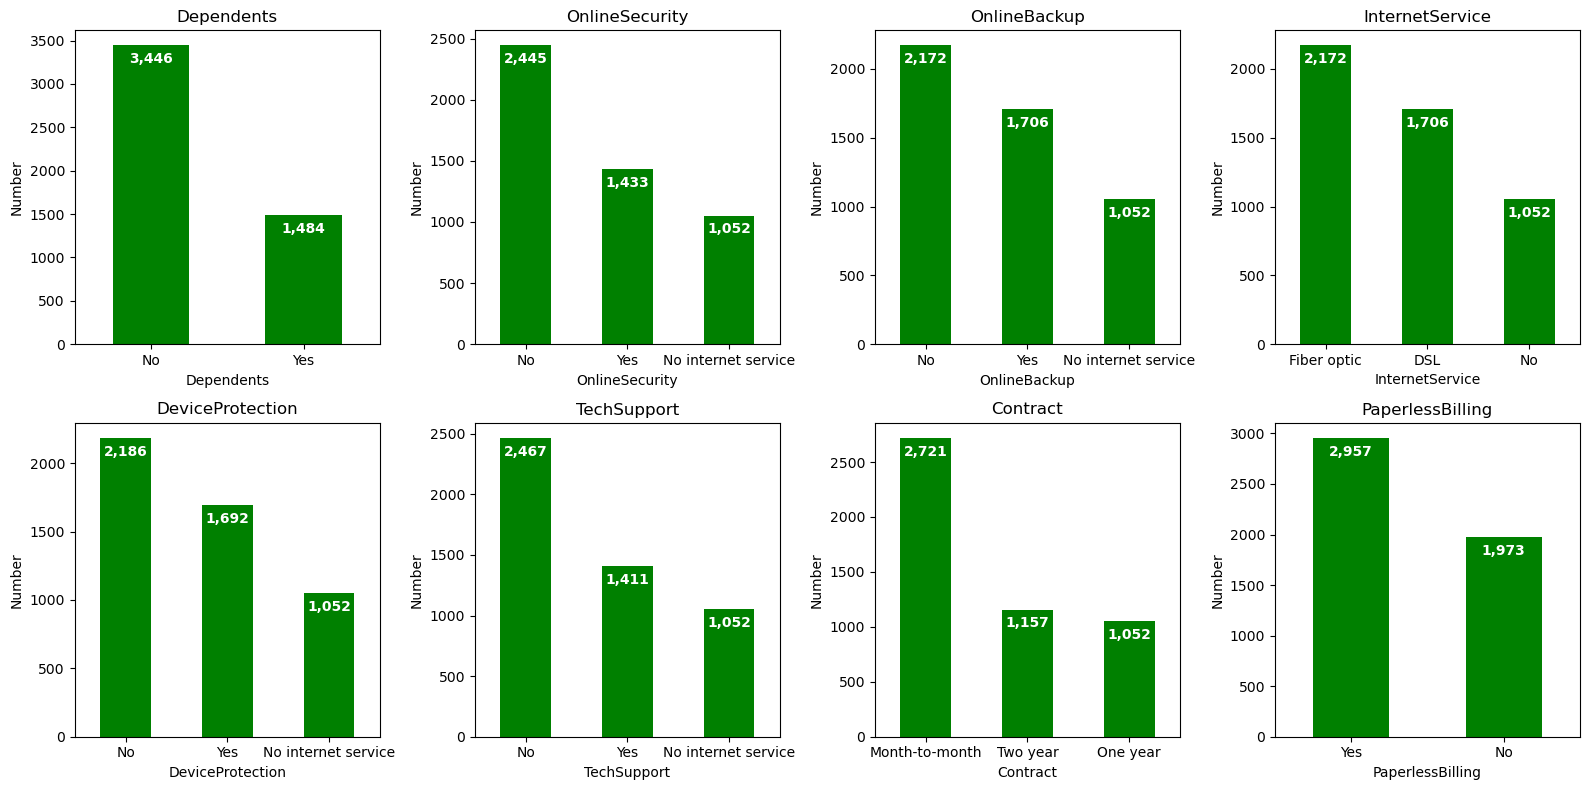

In [137]:
# membuat barplot value_counts untuk setiap kolom kategorikal
plt.figure(figsize=(16, 8), facecolor='white')
plotnumber = 1

for feature in cat_features[:-1]:
    # subplot (letak grafik)
    ax = plt.subplot(2, 4, plotnumber)
    
    # Harga rumah berdasarkan feature 
    ax = df[feature].value_counts().plot(kind = 'bar', rot = 0, color=['green'])
    
    plt.ylabel('Number')
    plt.xlabel(feature)
    plt.title(feature, fontsize=12)
    container = ax.containers[0]
    ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = -15, color="white", fontweight='bold')
    plt.tight_layout();
    
    plotnumber += 1

Dari data di atas kita dapat melihat bahwa :
- Mayoritas pelanggan tidak memiliki `Dependents` (anak, orangtua, kakek/nenek, dll).
- Layanan internet yang paling banyak digunakan adalah Fiber optic diikuti oleh DSL, sedangkan sisanya sebanyak 1052 pelanggan tidak menggunakan layanan internet.
- Kebanyakan pelanggan tidak menggunakan layanan `OnlineSecurity`, `OnlineBackup`, `Device Protection`, dan `Tech Support`.
- Pelanggan paling banyak menggunakan kontrak jangka pendek (Month-to-month) dibandingkan kontrak jangka panjang (One year dan Two year).
- Mayoritas pelanggan menggunakan `Paperlessbilling`.

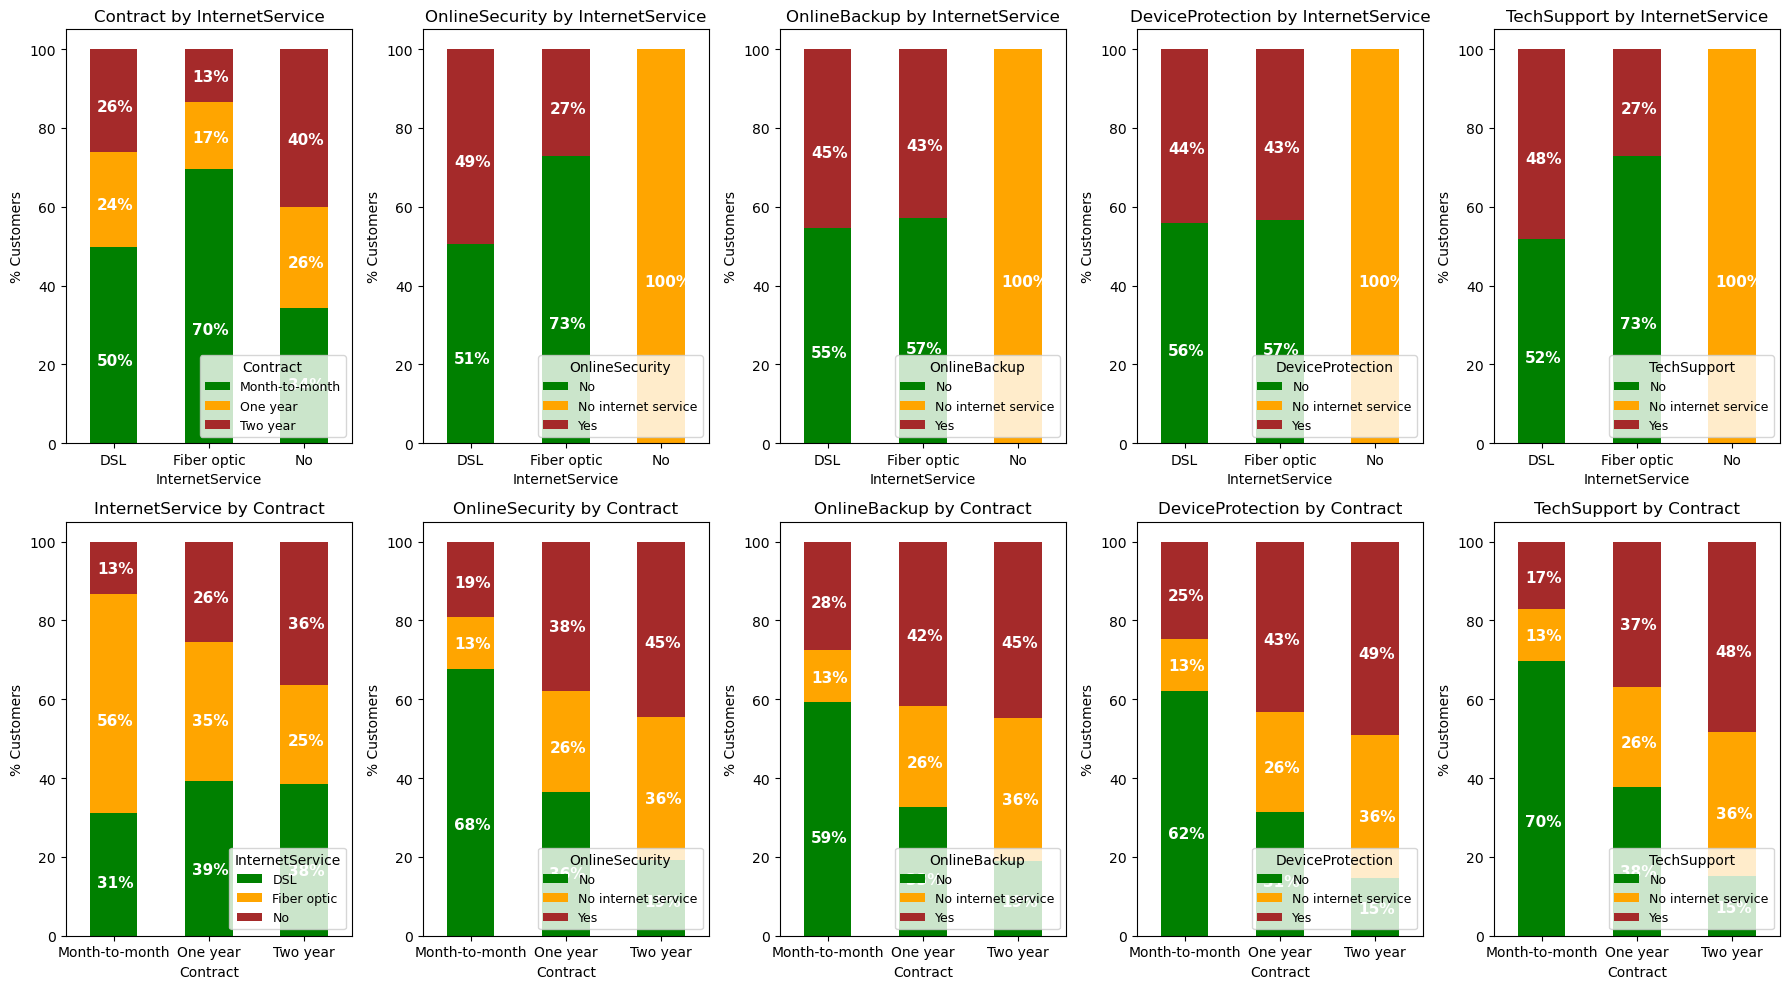

In [138]:
# membuat stacked bar chart untuk melihat proporsi setiap layanan berdasarkan Internet Service dan Contract
plt.figure(figsize=(18, 10), facecolor='white')
plotnumber = 1

for base in ['InternetService', 'Contract'] :
    if base == 'InternetService':
        list_features = ['Contract', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
    else :
        list_features = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
    
    for feature in list_features:

        column1 = base
        column2 = feature

        # membuat table berdasarkan 2 kolom kategorikal
        groupby_table = df.groupby([column1,column2]).size().unstack()

        # fungsi untuk pelabelan dimana jika nilainya 0 tidak akan ditampilkan
        def show() :
            if height > 0 :
                return '{:.0f}%'.format(height)
            else :
                return '' 
        
        # subplot (letak grafik)
        ax = plt.subplot(2, 5, plotnumber)
        
        # Harga rumah berdasarkan feature 
        (groupby_table.T*100.0 / groupby_table.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0, 
                                                                ax = ax,
                                                                color = ['green', 'orange', 'brown'])

        ax.legend(loc = 'lower right', prop={'size':9},title = column2)
        ax.set_ylabel('% Customers')
        ax.set_title(f'{column2} by {column1}',size = 12)

        # menambahkan label data pada stacked bar chart
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate(show(), (p.get_x()+0.15*width, p.get_y()+.4*height),
                        color = 'white',
                        weight = 'bold',
                        size = 11)
        
        plt.tight_layout();
        
        plotnumber += 1

Dari grafik di atas kita juga dapat melihat bahwa :
- Mayoritas pengguna 'Fiber optic' lebih banyak memilih `Contract` 'Month-to-month'.
- Mayoritas pengguna 'Fiber optic' juga tidak menggunakan layanan `OnlineSecurity` dan `TechSupport`
- Pelanggan dengan `Contract` 'Month-to-month' umumnya tidak menggunakan layanan `Online Security`, `Online Backup`, `DeviceProtection`, dan `TechSupport`
- Sedangkan pelanggan dengan `Contract` 'Two year' lebih banyak menggunakan layanan `Online Security`, `Online Backup`, `DeviceProtection`, dan `TechSupport`
- Sehingga kita dapat asumsikan  bahwa pelanggan dengan kontrak yang lebih panjang cenderung memiliki engagement untuk penggunaan layanan yang lebih tinggi.

#### CATEGORICAL FEATURES

In [139]:
# Numerical Features
num_feature = [feature for feature in df.describe().columns]
num_feature

['tenure', 'MonthlyCharges']

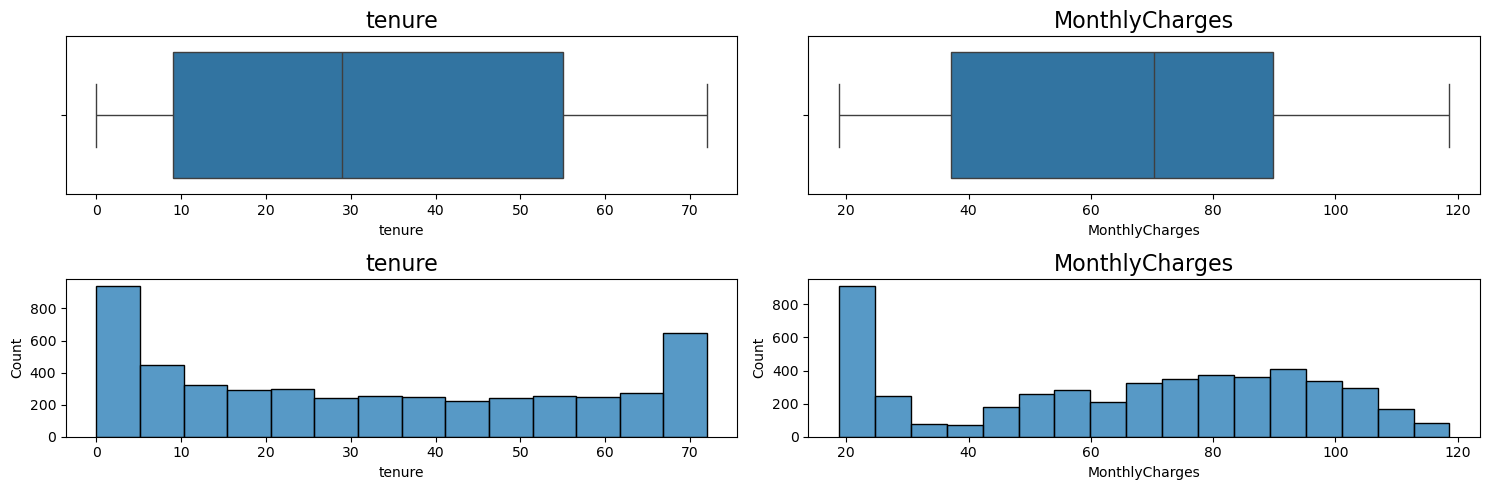

In [140]:
# boxplot
plt.figure(figsize=(15, 5), facecolor='white')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(2,2, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

for feature in num_feature:
    ax = plt.subplot(2,2, plotnumber)
    sns.histplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

Kita dapat melihat bahwa :
- Data `tenure` dan `MonthlyCharges` tidak terdistribusi normal.
- Keduanya juga tidak memiliki data outlier dilihat dari boxplot di atas

C:\Users\Rafi Arya\AppData\Local\Temp\ipykernel_23016\808068481.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.


C:\Users\Rafi Arya\AppData\Local\Temp\ipykernel_23016\808068481.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.


C:\Users\Rafi Arya\AppData\Local\Temp\ipykernel_23016\808068481.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.


C:\Users\Rafi Arya\AppData\Local\Temp\ipykernel_23016\808068481.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.


C:\Users\Rafi Arya\AppData\Local\Temp\ipykernel_23016\808068481.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.


C:\Users\Rafi Arya\AppData\Local\Temp\ipykernel_23016\808068481.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for

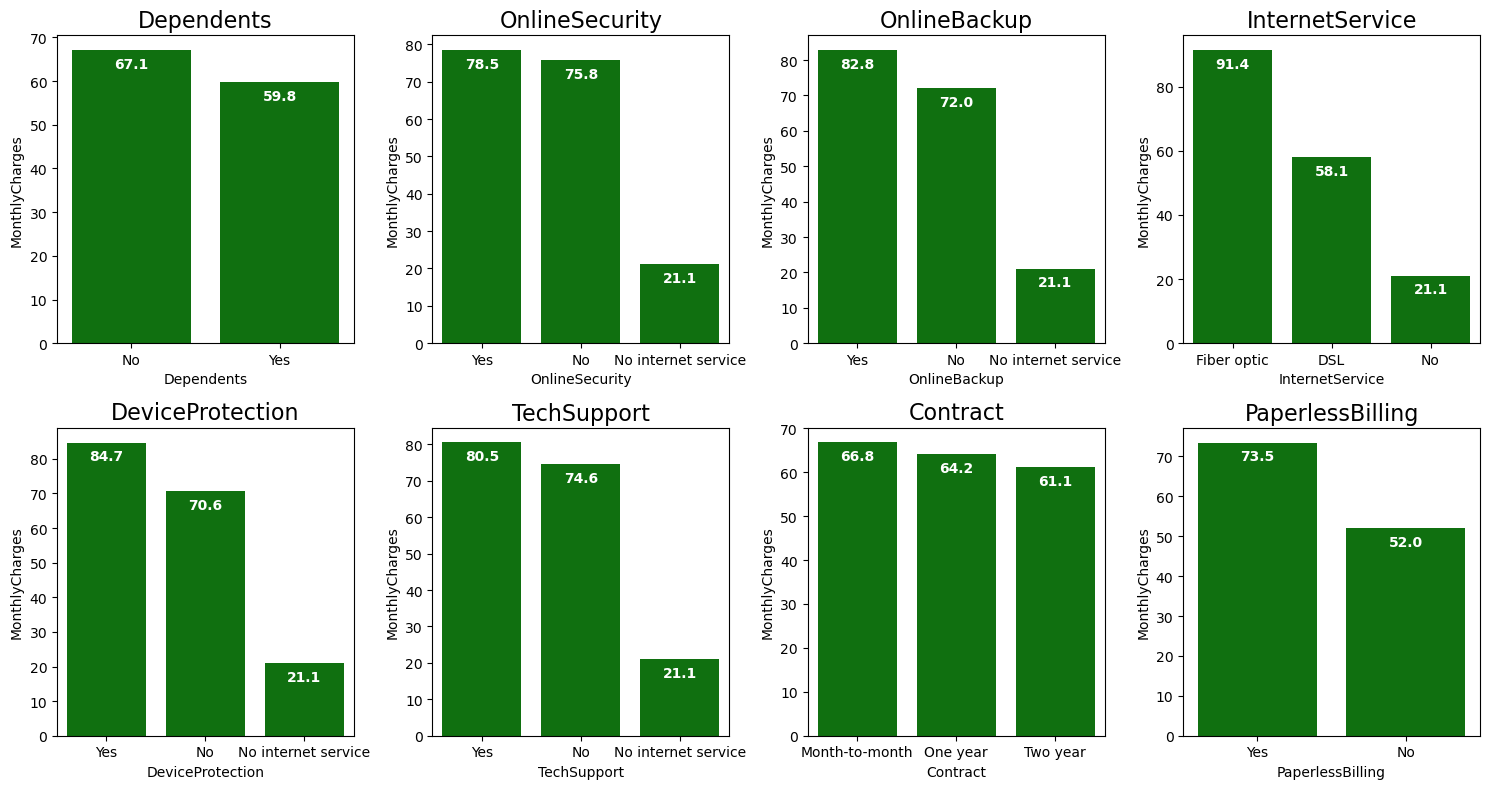

In [141]:
# barplot
plt.figure(figsize=(15, 8), facecolor='white')
plotnumber = 1
    
for feature in cat_features[:-1]:
    ax = plt.subplot(2,4, plotnumber)
    sns.barplot(data=df, y = 'MonthlyCharges', x=feature, ci=0, color='green', order=df.groupby(feature)['MonthlyCharges'].mean().sort_values(ascending=False).index.values);
    plt.title(feature, fontsize=16)
    container = ax.containers[0]
    ax.bar_label(container , labels=[f'{x:,.1f}' for x in container.datavalues], label_type='edge', padding = -15, color="white", fontweight='bold')
    plt.tight_layout()
    plotnumber += 1


Dari grafik di atas kita dapat mengetahui bahwa :
- Rata-rata `MonthlyCharges` untuk pelanggan yang tidak memiliki `Dependents` cenderung lebih tinggi daripada pelanggan yang memiliki `Dependents`
- Rata-rata `MonthlyCharges` untuk pelanggan yang menggunakan `InternetService` Fiber optic cenderung lebih tinggi daripada pelanggan yang menggunakan DSL
- Rata-rata `MonthlyCharges` untuk pelanggan yang menggunakan layanan `OnlineSecurity, OnlineBackup, DeviceProtection` dan `TechSupport` cenderung lebih tinggi daripada pelanggan yang tidak menggunakan layanan tersebut. Hal ini wajar terjadi karena kita bisa mengasumsikan bahwa untuk menggunakan layanan tersebut pelanggan akan dikenakan biaya tambahan.
- Rata-rata `MonthlyCharges` untuk pelanggan dengan `Contract` Month-to-month cenderung lebih tinggi daripada pelanggan dengan `Contract` One year dan Two year. Kita dapat mengasumsikan bahwa pelanggan dengan kontrak yang bersifat jangka panjang (One year dan Two year) mendapatkan diskon atau tarif yang lebih murah dibandingkan pelanggan yang berlangganan untuk jangka pendek.
- Rata-rata `MonthlyCharges` untuk pelanggan yang menggunakan `PaperlessBilling` cenderung lebih tinggi daripada pelanggan yang tidak menggunakan.

C:\Users\Rafi Arya\AppData\Local\Temp\ipykernel_23016\24206616.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.


C:\Users\Rafi Arya\AppData\Local\Temp\ipykernel_23016\24206616.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.


C:\Users\Rafi Arya\AppData\Local\Temp\ipykernel_23016\24206616.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.


C:\Users\Rafi Arya\AppData\Local\Temp\ipykernel_23016\24206616.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.


C:\Users\Rafi Arya\AppData\Local\Temp\ipykernel_23016\24206616.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.


C:\Users\Rafi Arya\AppData\Local\Temp\ipykernel_23016\24206616.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the s

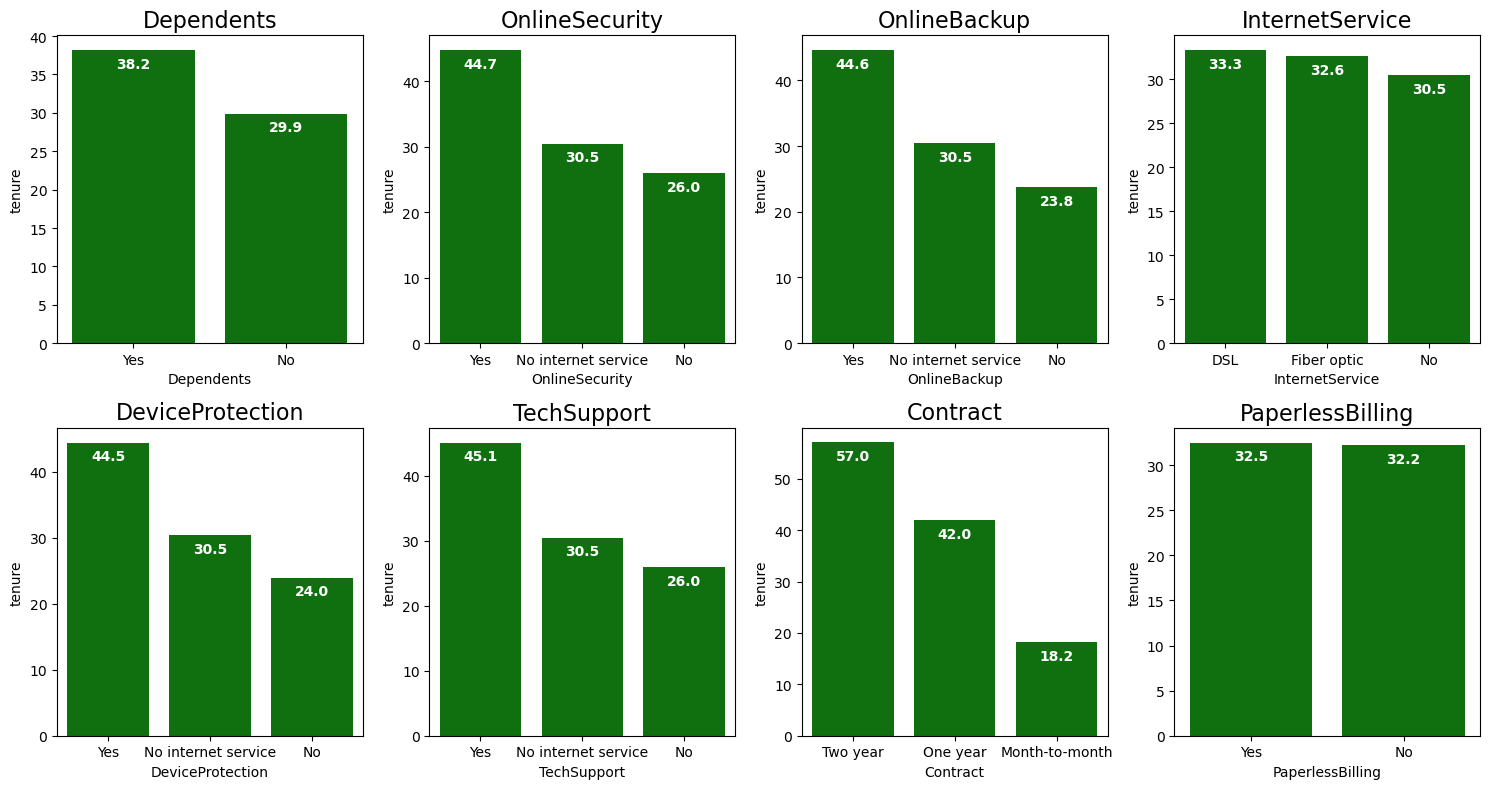

In [142]:
# barplot
plt.figure(figsize=(15, 8), facecolor='white')
plotnumber = 1
    
for feature in cat_features[:-1]:
    ax = plt.subplot(2,4, plotnumber)
    sns.barplot(data=df, y = 'tenure', x=feature, ci=0, color='green', order=df.groupby(feature)['tenure'].mean().sort_values(ascending=False).index.values);
    plt.title(feature, fontsize=16)
    container = ax.containers[0]
    ax.bar_label(container , labels=[f'{x:,.1f}' for x in container.datavalues], label_type='edge', padding = -15, color="white", fontweight='bold')
    plt.tight_layout()
    plotnumber += 1

Dari grafik di atas kita dapat mengetahui bahwa :
- Rata-rata `tenure` untuk pelanggan yang tidak memiliki `Dependents` cenderung lebih tinggi daripada pelanggan yang memiliki `Dependents`
- Rata-rata `tenure` untuk pelanggan yang menggunakan `InternetService` DSL cenderung lebih tinggi daripada pelanggan yang menggunakan Fiber optic
- Rata-rata `tenure` untuk pelanggan yang menggunakan layanan `OnlineSecurity, OnlineBackup, DeviceProtection` dan `TechSupport` cenderung lebih tinggi daripada pelanggan yang tidak menggunakan layanan tersebut. 
- Rata-rata `tenure` untuk pelanggan dengan `Contract` Two year cenderung lebih tinggi daripada pelanggan dengan `Contract` One year dan Month-to-Month.
- Rata-rata `tenure` untuk pelanggan yang menggunakan `PaperlessBilling` maupun tidak, tidak begitu jauh berbeda.

## 3. DATA PRE-PROCESSING

In [143]:
df_churn = df.copy()

### CHANGE VALUE

Kita ubah terlebih dahulu nilai pada kolom `Churn` dari 'Yes' dan 'No' menjadi 1 dan 0. Karena fokus utama kita adalah yang churn, maka :

Target :

0 : Tidak berhenti berlangganan (`Churn` == 'No')

1 : Berhenti berlangganan (`Churn` == 'Yes')

In [144]:
df_churn['Churn'] = np.where(df_churn['Churn']=='Yes',1,0)
df_churn['Churn'].unique()

array([1, 0])

### DATA DUPLICATES

In [145]:
print(f'duplicate data: {df.duplicated().sum()}')
print(f'duplicate data percentage : {df.duplicated().sum()/len(df)*100:.2f}%')

duplicate data: 77
duplicate data percentage : 1.56%


In [146]:
df[df.duplicated()].head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
624,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
701,No,41,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.65,No
786,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.65,Yes
951,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.15,Yes
1266,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No


In [147]:
# Index it's original one and the duplicates

df[(df['Dependents'] == 'No') & (df['tenure'] == 1) & (df['OnlineSecurity'] == 'No internet service') & (df['OnlineBackup'] == 'No internet service') & (df['InternetService'] == 'No') & (df['DeviceProtection'] == 'No internet service') & (df['TechSupport'] == 'No internet service') & (df['Contract'] == 'Month-to-month') & (df['PaperlessBilling'] == 'No') & (df['MonthlyCharges'] == 19.65) & (df['Churn'] == 'No')]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
187,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
624,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
1266,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
3801,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No


In [148]:
df2 = df.drop_duplicates()

In [149]:
print(f'duplicate data: {df2.duplicated().sum()}')

duplicate data: 0


### MISSING VALUES


In [150]:
df2.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

### OUTLIERS

In [151]:
# Create boxplot for tenure
fig_box = px.box(df, y='tenure', title='Boxplot of Tenure', color_discrete_sequence=['#3A4C6A'])

fig_box.update_layout(
    autosize=False,
    width=350,
    height=350,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=50,
        pad=0
    ),
    plot_bgcolor='white',
    showlegend=False
)

Tenure tidak memiliki outlier. Dengan nilai maksimum 72 dan 0 sebagai nilai minimum Tenure.

In [152]:
# Create boxplot for MonthlyCharges
fig_box = px.box(df, y='MonthlyCharges', title='Boxplot of MonthlyCharges', color_discrete_sequence=['#3A4C6A'])

fig_box.update_layout(
    autosize=False,
    width=350,
    height=350,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=50,
        pad=0
    ),
    plot_bgcolor='white',
    showlegend=False
)

MonthlyCharges tidak memiliki outlier. Dengan nilai maksimum 118.65 dan 18.8 sebagai nilai minimum MonthlyCharges.

### ENCODING

In [153]:
# menampilkan jumlah unik dan unique values untuk setiap kolom
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in cat_features[:-1] :
    listItem.append( [col, df_churn[col].nunique(), df_churn.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,Dependents,2,"[No, Yes]"
1,OnlineSecurity,3,"[No, No internet service, Yes]"
2,OnlineBackup,3,"[No, No internet service, Yes]"
3,InternetService,3,"[DSL, Fiber optic, No]"
4,DeviceProtection,3,"[No, No internet service, Yes]"
5,TechSupport,3,"[No, No internet service, Yes]"
6,Contract,3,"[Month-to-month, One year, Two year]"
7,PaperlessBilling,2,"[No, Yes]"


In [154]:
# mapping untuk ordinal encoder

ordinal_mapping = [
    {'col':'InternetService', 'mapping':{None:0, 'Fiber optic':3, 'DSL':2, 'No':1}},
    {'col':'Contract', 'mapping':{None:0, 'Month-to-month':3, 'One year':2, 'Two year':1}}
]

In [155]:
transformer = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']),
    ('ordinal', ce.OrdinalEncoder(cols=['InternetService', 'Contract'], mapping=ordinal_mapping), ['InternetService', 'Contract']),
], remainder='passthrough')

### SCALING

In [156]:
scaler = MinMaxScaler()

Scaling dilakukan didasarkan pada akan digunakannya metode KNN dan Logistic Regression. Di samping itu, pada data `tenure` dan `MonthlyCharges` tidak terdapat outlier

### IMBALANCE DATA

In [157]:
# Check the class distribution 
from collections import Counter

print("Class distribution:", Counter(df_churn['Churn']))

Class distribution: Counter({0: 3614, 1: 1316})


In [158]:
df_churn['Churn'].value_counts(normalize=True)

Churn
0    0.733063
1    0.266937
Name: proportion, dtype: float64

Berdasarkan [sumber](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets), dapat diketahui bawah dataset tidak seimbang (***mild imbalance***) karena proporsi kelas minoritas sebesar 26.54% berada pada rentang 20-40% dari dataset.

Sehingga dilakukan resampling dengan SMOTENC, supaya data yang dimiliki memiliki distribusi kelas yang lebih seimbang

In [159]:
# define oversampling 
resample = SMOTENC(random_state=0, categorical_features=[0, 2, 3, 4, 5, 6, 7, 8]) #['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 
                                                                                    # 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']
       

### DEFINE X & Y

Selanjutnya kita definisikan feature dan targetnya :
- feature : `Dependents, tenure, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges`
- target : `Churn`

In [160]:
# define fetures and target
X = df_churn.drop(columns = ['Churn'])
y = df_churn['Churn']

### DATA SPLITTING

Untuk pemodelan ini kita akan menggunakan test size = 0.2 sehingga data testing adalah sebesar 20% dari keseluruhan dataset.

Karena kita akan menggunakan Classification untuk memprediksi data atau label yang sifatnya kategorik, maka kita menggunakan stratify=y agar proporsi nilai Churn pada y_train dan y_test sama.

In [161]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2, stratify=y)

In [162]:
y_train.value_counts() / len(y_train)

Churn
0    0.733012
1    0.266988
Name: count, dtype: float64

In [163]:
y_test.value_counts() / len(y_test)

Churn
0    0.733266
1    0.266734
Name: count, dtype: float64

# 4. MODELLING & EVALUATION

In [164]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
grad = GradientBoostingClassifier(random_state=0)
cat = CatBoostClassifier(verbose=False,random_state=0)
xgb = XGBClassifier(random_state=0)
lgbm = LGBMClassifier(random_state=0)

In [165]:
# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

### MODEL BENCHMARKING - DEFAULT HYPERPARAMETER : CROSS VALIDATION

In [166]:
# untuk menyatukan resampler dan function dari sklearn
from imblearn.pipeline import Pipeline

In [167]:
models = [logreg, knn, tree, rf, ada, grad, cat, xgb, lgbm]

list_mean_with_sampling = []
list_std_with_sampling = []
list_mean_without_sampling = []
list_std_without_sampling = []

for model in  models :

    # modeling with oversampling
    pipe_model_with_sampling = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', resample),
        ('algo', model)
    ])

    model_cv_with_sampling = cross_val_score(
        estimator = pipe_model_with_sampling,
        X = X_train,
        y = y_train,
        cv = skf,
        scoring = f2_score,
        n_jobs = -1
    )
    list_mean_with_sampling.append(model_cv_with_sampling.mean())
    list_std_with_sampling.append(model_cv_with_sampling.std())

    # modeling without oversampling

    pipe_model_without_sampling = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('algo', model)
    ])

    model_cv_without_sampling = cross_val_score(
        estimator = pipe_model_without_sampling,
        X = X_train,
        y = y_train,
        cv = skf,
        scoring = f2_score,
        n_jobs = -1
    )
    list_mean_without_sampling.append(model_cv_without_sampling.mean())
    list_std_without_sampling.append(model_cv_without_sampling.std())

In [168]:
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'mean_f2score_with_sampling' : list_mean_with_sampling,
    'mean_f2score_without_sampling' : list_mean_without_sampling,
    'std_f2score_with_sampling' : list_std_with_sampling,
    'std_f2score_without_sampling' : list_std_without_sampling,
}).sort_values('mean_f2score_with_sampling', ascending=False)

,model,mean_f2score_with_sampling,mean_f2score_without_sampling,std_f2score_with_sampling,std_f2score_without_sampling
4,AdaBoost,0.725010,0.553632,0.013337,0.030210
0,Logistic Regression,0.719776,0.545277,0.022386,0.032046
5,GradienBoost,0.709166,0.538216,0.016466,0.032712
6,CatBoost,0.675970,0.525584,0.012283,0.042699
8,LightGBM,0.659858,0.537022,0.032488,0.034078
7,XGBoost,0.644205,0.525969,0.020071,0.032474
1,KNN,0.620200,0.489480,0.027265,0.023684
3,Random Forest,0.584560,0.494188,0.026338,0.032013
2,Decision Tree,0.558028,0.506482,0.025766,0.021010


Terlihat bahwa model Logistic Regression adalah yang terbaik untuk f2score-nya dari setiap model yang menggunakan default hyperparameter.

Terlihat juga bahwa untuk rata-rata f2score dari validation set lebih baik setelah dilakukan oversampling dibandingkan tanpa oversampling. Hal tersebut menunjukkan bahwa teknik resampling menggunakan SMOTENC mampu meningkatkan performa algoritma klasifikasi dalam meminimalisir jumlah pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn (False Negatif), sehingga nilai f2score-nya naik.

### MODEL BENCHMARKING- DEFAULT HYPERPARAMETER : TRAIN & TEST DATA

In [169]:
models = [logreg, knn, tree, rf, ada, grad, cat, xgb, lgbm]
score_f2_test = []
score_f2_train = []

def y_pred_func(model):
    estimator = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', resample),
        ('algo', model)
    ])
    
    estimator.fit(X_train,y_train)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    score_f2_test.append(fbeta_score(y_test,y_pred_test, beta=2))
    score_f2_train.append(fbeta_score(y_train,y_pred_train, beta=2))

c:\Users\Rafi Arya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[LightGBM] [Info] Number of positive: 2891, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 5782, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [170]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
             'f2 score (train set)': score_f2_train,
             'f2 score (validation set)': list_mean_with_sampling,
             'f2 score (test set)': score_f2_test}).set_index('model').sort_values(by='f2 score (validation set)',ascending=False)

,f2 score (train set),f2 score (validation set),f2 score (test set)
model,,,
AdaBoost,0.736500,0.725010,0.717736
Logistic Regression,0.719443,0.719776,0.710345
GradienBoost,0.746957,0.709166,0.697674
CatBoost,0.787112,0.675970,0.664488
LightGBM,0.795660,0.659858,0.659697
XGBoost,0.874362,0.644205,0.638686
KNN,0.778667,0.620200,0.636943
Random Forest,0.985568,0.584560,0.558069
Decision Tree,0.980747,0.558028,0.550326


Terlihat bahwa model Logistic Regression, AdaBoost dan GradientBoost memiliki hasil yang cukup stabil baik pada train set, validation maupun test set.

### MODEL BENCHMARKING - TUNING 1 HYPERPARAMETER : CROSS VALIDATION

Hyperparameters yang akan kita coba tuning untuk masing-masing model diantaranya yaitu :
- Logistic Regression --> **solver** : [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
- KNN --> **n_neighbors** : [bilangan ganjil dari 1 - 21]
- Decision Tree --> **max_depth** : [dari 1 sampai 10]
- Random Forest --> **max_features** : [dari 1 sampai 5]
- AdaBoost --> **learning_rate** : [0.001, 0.01, 0.1]
- GradientBoost --> **learning_rate** : [0.001, 0.01, 0.1]
- CatBoost --> **scale_pos_weight** : [2, 3, 5, 10, 20, 30]
- XGBoost --> **scale_pos_weight** : [2, 3, 5, 10, 20, 30]
- LightGBM --> **scale_pos_weight** : [2, 3, 5, 10, 20, 30]

In [171]:
## hyperparameter dan model yang akan dipakai

param_logreg = {'algo__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
param_knn = {'algo__n_neighbors' : range(1,22,2)}
param_tree = {'algo__max_depth' : range(1,10,1)}
param_rf = {'algo__max_features' : range(1,6,1)}
param_ada = {'algo__learning_rate' : [0.001, 0.01, 0.1]}
param_grad = {'algo__learning_rate' : [0.001, 0.01, 0.1]}
param_cat = {'algo__scale_pos_weight' : [2, 3, 5, 10, 20, 30]}
param_xgb = {'algo__scale_pos_weight' : [2, 3, 5, 10, 20, 30]}
param_lgbm = {'algo__scale_pos_weight' : [2, 3, 5, 10, 20, 30]}

models = [logreg, knn, tree, rf, ada, grad, cat, xgb, lgbm]
params = [param_logreg, param_knn, param_tree, param_rf, param_ada, param_grad, param_cat, param_xgb, param_lgbm]

In [172]:
# menentukan best params dan best score untuk masing masing model

list_best_param = []
list_best_score = []

for model, param in zip(models,params):
    ## hyperparameter 
    hyperparam_space = param

    # GridSearch CV
    benchmark_model = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', resample),
        ('algo', model)
    ])

    grid_search = GridSearchCV(
        estimator = benchmark_model,
        param_grid=hyperparam_space,
        cv=skf,
        scoring=f2_score,
        n_jobs=-1,
    )

    grid_search.fit(X_train, y_train)
    list_best_param.append(grid_search.best_params_)
    list_best_score.append(grid_search.best_score_)

c:\Users\Rafi Arya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[LightGBM] [Info] Number of positive: 2891, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 5782, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [173]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
             'best param': list_best_param,
             'best f2 score': list_best_score}).sort_values('best f2 score', ascending=False)

,model,best param,best f2 score
8,LightGBM,{'algo__scale_pos_weight': 30},0.744752
4,AdaBoost,{'algo__learning_rate': 0.1},0.742984
2,Decision Tree,{'algo__max_depth': 1},0.742595
6,CatBoost,{'algo__scale_pos_weight': 5},0.742091
7,XGBoost,{'algo__scale_pos_weight': 20},0.734806
5,GradienBoost,{'algo__learning_rate': 0.01},0.728797
0,Logistic Regression,{'algo__solver': 'liblinear'},0.720403
1,KNN,{'algo__n_neighbors': 15},0.674756
3,Random Forest,{'algo__max_features': 5},0.602014


Sekarang terlihat bahwa model AdaBoost (Interpretable AI) dan LightGBM (Explainable AI) adalah yang terbaik untuk f2_score-nya dari setiap model yang menggunakan tuning pada 1 hyperparameter.

### MODEL BENCHMARKING- TUNING 1 HYPERPARAMETER : TRAIN & TEST DATA

In [174]:
## ML Algo setelah tuning
logreg = LogisticRegression(solver = 'liblinear', random_state=0)
knn = KNeighborsClassifier(n_neighbors = 21)
tree = DecisionTreeClassifier(max_depth = 1, random_state=0)
rf = RandomForestClassifier(max_features = 4, random_state=0)
ada = AdaBoostClassifier(learning_rate = 0.001, random_state=0)
grad = GradientBoostingClassifier(learning_rate = 0.01, random_state=0)
cat = CatBoostClassifier(scale_pos_weight = 10, verbose=False,random_state=0)
xgb = XGBClassifier(scale_pos_weight = 30, random_state=0)
lgbm = LGBMClassifier(scale_pos_weight = 10, random_state=0)

In [175]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
             'f2 score (train set)': score_f2_train,
             'f2 score (validation set)': list_best_score,
             'f2 score (test set)': score_f2_test}).set_index('model').sort_values(by='f2 score (validation set)',ascending=False)

,f2 score (train set),f2 score (validation set),f2 score (test set)
model,,,
LightGBM,0.795660,0.744752,0.659697
AdaBoost,0.736500,0.742984,0.717736
Decision Tree,0.980747,0.742595,0.550326
CatBoost,0.787112,0.742091,0.664488
XGBoost,0.874362,0.734806,0.638686
GradienBoost,0.746957,0.728797,0.697674
Logistic Regression,0.719443,0.720403,0.710345
KNN,0.778667,0.674756,0.636943
Random Forest,0.985568,0.602014,0.558069


Berdasarkan hasil, LightGBM dan CatBoost adalah model terbaik untuk Explainable ML karena memiliki F2 score yang tinggi dan stabil pada train, validation, dan test set. Hal ini menunjukkan kemampuan kedua model untuk meminimalkan False Negative dan False Positive dengan baik.

Oleh karena itu, LightGBM dan CatBoost akan dijadikan benchmark untuk tuning lebih lanjut guna meningkatkan performanya.`

In [176]:
from sklearn.ensemble import AdaBoostClassifier

# Hyperparameter space untuk AdaBoost
hyperparam_space = {
    'algo__n_estimators': range(10, 200, 10),  # Jumlah estimators
    'algo__learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]  # Learning rate
}

# Pipeline dengan AdaBoost
benchmark_model = Pipeline([
    ('prep', transformer),
    ('scaler', scaler),
    ('resample', resample),
    ('algo', AdaBoostClassifier(random_state=0))  # Menggunakan default base estimator
])

# RandomizedSearchCV untuk AdaBoost
random_search_adaboost = RandomizedSearchCV(
    estimator=benchmark_model,
    param_distributions=hyperparam_space,
    cv=skf,
    scoring=f2_score,
    n_jobs=-1,
    n_iter=100,
    random_state=0
)

# Melatih model
random_search_adaboost.fit(X_train, y_train)


c:\Users\Rafi Arya\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning:

The total space of parameters 95 is smaller than n_iter=100. Running 95 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\Rafi Arya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'PaperlessBilling']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=...
                                             ('scaler', MinMaxScaler()),
                                             ('resample',
                                              SMOTENC(categorical_features=[0,
                                                                            2,
                                                                            3,
                                                                            4,
                                                                            5,
                                                                            6,
                                                                            7,
                                                                            8],
                                                      random_state=0)),
                                             ('algo',
                                              AdaBoostClassifier(random_state=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'algo__learning_rate': [0.01, 0.05, 0.1,
                                                                0.5, 1.0],
                                        'algo__n_estimators': range(10, 200, 10)},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [177]:
random_search_adaboost.best_score_

0.7456000937710334

In [178]:
random_search_adaboost.best_params_

{'algo__n_estimators': 20, 'algo__learning_rate': 0.1}

Hyperparameter terbaik AdaBoost dari hasil RandomSearch adalah n_estimators = 20 dan learning_rate = 0.1, dengan F2 score sebesar 0.7456. Nilai ini menunjukkan peningkatan kecil dibandingkan nilai awal sebelum tuning.

In [179]:
# Model benchmark AdaBoost menggunakan hyperparameter terbaik dari RandomSearch
adaboost_benchmark = Pipeline([
    ('prep', transformer),
    ('scaler', scaler),
    ('resample', resample),
    ('algo', AdaBoostClassifier(n_estimators=20, learning_rate=0.1, random_state=0))  # Hyperparameter terbaik
])

# Melatih model pada training set
adaboost_benchmark.fit(X_train, y_train)

# Melakukan prediksi pada test set
y_pred_adaboost_benchmark = adaboost_benchmark.predict(X_test)

# Menghitung F2 score pada test set
f2_score_adaboost = fbeta_score(y_test, y_pred_adaboost_benchmark, beta=2)

# Output F2 score
f2_score_adaboost


c:\Users\Rafi Arya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



0.7238520408163265

In [180]:
# Menggunakan model terbaik dari hasil RandomSearch
adaboost_after_tuning = random_search_adaboost.best_estimator_

# Melatih model terbaik pada training set
adaboost_after_tuning.fit(X_train, y_train)

# Melakukan prediksi pada test set
y_pred_adaboost_tuned = adaboost_after_tuning.predict(X_test)

# Menghitung F2 score pada test set
f2_score_adaboost_tuned = fbeta_score(y_test, y_pred_adaboost_tuned, beta=2)

# Output F2 score
f2_score_adaboost_tuned


c:\Users\Rafi Arya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



0.7238520408163265

Terlihat bahwa model Adaboost setelah kita tuning hyperparameternya memiliki nilai f2 score yang sama dengan model Benchmark pada test set.

### HYPERPARAMETER TUNING : LIGHTGBM

In [181]:
## hyperparameter untuk LightGBM
hyperparam_space = {
    'algo__scale_pos_weight' : [2, 3, 5, 10, 20, 30],
    'algo__learning_rate' : [0.001, 0.01, 0.1, 1],
    'algo__max_depth' : range(2,10,1),
}

# RandomizedSearch CV

benchmark_model = Pipeline([
    ('prep', transformer),
    ('scaler', scaler),
    ('resample', resample),
    ('algo', LGBMClassifier(random_state=0))
])

random_search_lgbm = RandomizedSearchCV(
    estimator = benchmark_model,
    param_distributions=hyperparam_space,
    cv=skf,
    scoring=f2_score,
    n_jobs=-1,
    n_iter = 50,
    random_state = 0
)

random_search_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2891, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 5782, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'PaperlessBilling']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=...
                                             ('resample',
                                              SMOTENC(categorical_features=[0,
                                                                            2,
                                                                            3,
                                                                            4,
                                                                            5,
                                                                            6,
                                                                            7,
                                                                            8],
                                                      random_state=0)),
                                             ('algo',
                                              LGBMClassifier(random_state=0))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'algo__learning_rate': [0.001, 0.01,
                                                                0.1, 1],
                                        'algo__max_depth': range(2, 10),
                                        'algo__scale_pos_weight': [2, 3, 5, 10,
                                                                   20, 30]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [182]:
random_search_lgbm.best_score_

0.7505613203220141

In [183]:
random_search_lgbm.best_params_

{'algo__scale_pos_weight': 2,
 'algo__max_depth': 4,
 'algo__learning_rate': 0.01}

Hyperparameter terbaik LightGBM dari hasil RandomSearch => `scale_pos_weight` = 2, `learning_rate` = 0.01, `depth` = 4 dengan f2 score 0.75056. Nilai ini naik dibandingkan dengan nilai sebelum tuning.

In [184]:
# model benchmark predict to test set
lgbm_benchmark = Pipeline([
    ('prep', transformer),
    ('scaler', scaler),
    ('resample', resample),
    ('algo', LGBMClassifier(scale_pos_weight = 10, random_state=0))
])

lgbm_benchmark.fit(X_train, y_train)
y_pred_lgbm_benchmark = lgbm_benchmark.predict(X_test)
fbeta_score(y_test, y_pred_lgbm_benchmark, beta=2) 

[LightGBM] [Info] Number of positive: 2891, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 5782, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


0.7235621521335807

In [185]:
# model after tuning predict to test set
lgbm_after_tuning = random_search_lgbm.best_estimator_
lgbm_after_tuning.fit(X_train, y_train)
y_pred_lgbm_tuned = lgbm_after_tuning.predict(X_test)
fbeta_score(y_test, y_pred_lgbm_tuned, beta=2)

[LightGBM] [Info] Number of positive: 2891, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 5782, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

0.7287066246056783

Terlihat bahwa model LightGBM setelah kita tuning hyperparameternya memiliki nilai f2_score yang lebih tinggi (0.728706) dari model Benchmark pada test set (0.723562).

### KOMPARASI : ADABOOST DAN LIGHTGBM

In [186]:
# Membuat tabulasi F2 score
df_score = pd.DataFrame({
    'AdaBoost': [
        list_best_score[2],  # F2 score awal sebelum tuning (benchmark AdaBoost)
        random_search_adaboost.best_score_,  # F2 score terbaik dari RandomSearchCV
        fbeta_score(y_test, y_pred_adaboost_benchmark, beta=2),  # F2 score benchmark AdaBoost pada test set
        fbeta_score(y_test, y_pred_adaboost_tuned, beta=2)  # F2 score AdaBoost setelah tuning pada test set
    ],
    'LightGBM': [
        list_best_score[6],  # F2 score awal sebelum tuning (benchmark LightGBM)
        random_search_lgbm.best_score_,  # F2 score terbaik dari RandomSearchCV
        fbeta_score(y_test, y_pred_lgbm_benchmark, beta=2),  # F2 score benchmark LightGBM pada test set
        fbeta_score(y_test, y_pred_lgbm_tuned, beta=2)  # F2 score LightGBM setelah tuning pada test set
    ]
}, index=['Initial F2 Score', 'Best F2 Score (Validation)', 'F2 Score (Test Benchmark)', 'F2 Score (Test Tuned)'])


In [187]:
# untuk label index
outside = ['Train Set', 'Train Set', 'Test Set', 'Test Set',]
inside = ['Benchmark Model', 'Tuning Model', 'Benchmark Model', 'Tuning Model']

# memasangkan item pada index yang sama dari 2 list
hier_index = list(zip(outside, inside))

# membuat multiindex 
multi = pd.MultiIndex.from_tuples(hier_index)


In [188]:
# mengubah lavel index lama menjadi multi-index yang telah kita buat di atas
df_score.index = multi
df_score

AdaBoost  LightGBM
Train Set Benchmark Model  0.742595  0.742091
          Tuning Model     0.745600  0.750561
Test Set  Benchmark Model  0.723852  0.723562
          Tuning Model     0.723852  0.728707

Terlihat bahwa:

- F2 Score pada Train Set baik untuk Benchmark Model maupun Model yang sudah di-tuning pada AdaBoost besarnya hampir sama yaitu 0.742595 dan 0.745600.
- F2 Score pada Test Set baik untuk Benchmark Model maupun Model yang sudah di-tuning pada AdaBoost besarnya sama yaitu 0.723852.
- F2 Score pada Train Set untuk Model LightGBM yang sudah di-tuning (0.750561) lebih tinggi dari Benchmark Model (0.742091).
- F2 Score pada Test Set untuk Model LightGBM yang sudah di-tuning (0.728707) lebih tinggi dari Benchmark Model (0.723562).

Maka kita akan gunakan model AdaBoost yang telah di-tuning sebagai Interpretable ML kita dan model LightGBM yang telah di-tuning sebagai Explainable ML.

### FINAL MODEL - ADABOOST AS INTERPRETABLE ML

In [189]:
# Menyimpan algoritma model AdaBoost terbaik sebagai best_ada
best_ada = Pipeline([
    ('prep', transformer),  # Preprocessing
    ('algo', AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0))  # Model
])

# Melatih model menggunakan data hasil resampling
best_ada.fit(X_resampled, y_resampled)

# Membuat prediksi pada data test
y_pred_best_ada = best_ada.predict(X_test)

# Menghitung F2 Score
fbeta = fbeta_score(y_test, y_pred_best_ada, beta=2)
print("F2 Score for AdaBoost:", fbeta)


c:\Users\Rafi Arya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



F2 Score for AdaBoost: 0.7196710075394106


Pada model best_ada di atas terlihat bahwa meskipun tidak dilakukan scaling, score F2 pada test set masih berada di angka 0.719671. Hal ini menunjukkan bahwa scaling tidak berpengaruh signifikan terhadap performa model AdaBoost yang kita buat. Oleh karenanya metode scaling tidak kita terapkan pada model AdaBoost akhir kita untuk menjaga proses tetap sederhana tanpa mengorbankan performa model.

#### FEATURE IMPORTANCES

In [198]:
# Mendapatkan nama fitur dari transformer
names = transformer.get_feature_names_out()
print(names)


['one_hot_encoder__Dependents_Yes'
 'one_hot_encoder__OnlineSecurity_No internet service'
 'one_hot_encoder__OnlineSecurity_Yes'
 'one_hot_encoder__OnlineBackup_No internet service'
 'one_hot_encoder__OnlineBackup_Yes'
 'one_hot_encoder__DeviceProtection_No internet service'
 'one_hot_encoder__DeviceProtection_Yes'
 'one_hot_encoder__TechSupport_No internet service'
 'one_hot_encoder__TechSupport_Yes'
 'one_hot_encoder__PaperlessBilling_Yes' 'ordinal__InternetService'
 'ordinal__Contract' 'remainder__tenure' 'remainder__MonthlyCharges']


In [199]:
columns = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']
codes = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5']
list_name = []

# mengganti variable x0,..., x5 menjadi nama kolomnya
for i, (code, column) in enumerate(zip(codes,columns)):
    list_name.append(names[i].replace(code, column))

# menambahkan  'ordinal__InternetService', 'ordinal__Contract', 'tenure', 'MonthlyCharges' 
list_name.extend(names[6:])
list_name


['one_hot_encoder__Dependents_Yes',
 'one_hot_encoder__OnlineSecurity_No internet service',
 'one_hot_encoder__OnlineSecurity_Yes',
 'one_hot_encoder__OnlineBackup_No internet service',
 'one_hot_encoder__OnlineBackup_Yes',
 'one_hot_encoder__DeviceProtection_No internet service',
 'one_hot_encoder__DeviceProtection_Yes',
 'one_hot_encoder__TechSupport_No internet service',
 'one_hot_encoder__TechSupport_Yes',
 'one_hot_encoder__PaperlessBilling_Yes',
 'ordinal__InternetService',
 'ordinal__Contract',
 'remainder__tenure',
 'remainder__MonthlyCharges']

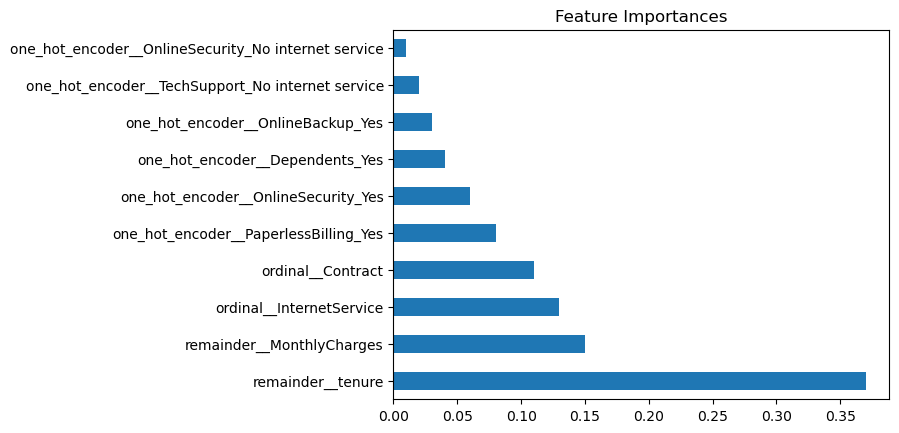

In [200]:
coef1 = pd.Series(best_ada['algo'].feature_importances_, list_name).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

#### PLOT TREE


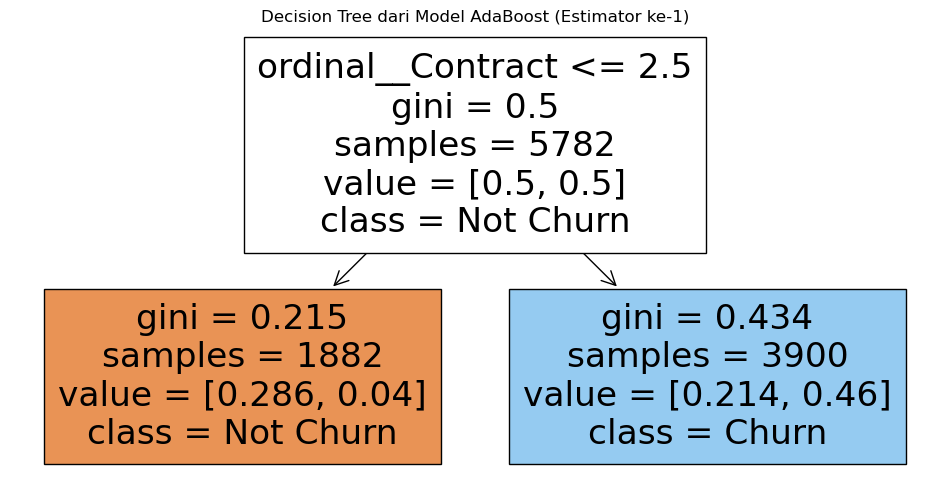

In [206]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Mengambil salah satu tree dari model AdaBoost (misalnya tree pertama)
base_estimator = best_ada['algo'].estimators_[0]  # Ambil tree pertama

# Visualisasi Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(
    base_estimator,
    feature_names=list_name,  # Nama fitur
    filled=True,
    class_names=['Not Churn', 'Churn']  # Kelas target
)
plt.title("Decision Tree dari Model AdaBoost (Estimator ke-1)")
plt.show()


- Jika nilai ini kecil (<= 2.5), maka kemungkinan besar data akan masuk ke kelas "Not Churn".
- Jika nilai ini besar (> 2.5), maka kemungkinan besar data akan masuk ke kelas "Churn".

#### CONFUSION MATRIX

<Axes: >

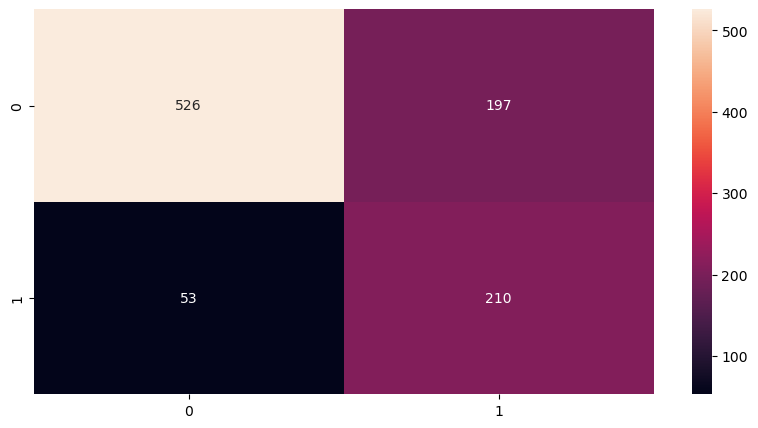

In [210]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred_best_ada), annot=True, fmt=".0f")

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model Decision Tree yang telah kita buat didapati:
- Jumlah pelanggan yang aktualnya churn dan diprediksi akan churn (True Positive) : 210 orang
- Jumlah pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn (False Negative) : 53 orang
- Jumlah pelanggan yang aktualnya tidak churn dan diprediksi tidak akan churn (True Negative) : 526 orang
- Jumlah pelanggan yang aktualnya tidak churn tetapi diprediksi akan churn (False Positive) : 197 orang
- Jumlah pelanggan yang diprediksi akan churn sebanyak 197 + 210 = 407 orang
- Jumlah pelanggan yang diprediksi tidak akan churn sebanyak 526 + 53 = 579 orang


In [211]:
# score

print('Recall:', recall_score(y_test, y_pred_best_ada))
print('Precision:', precision_score(y_test, y_pred_best_ada))
print('F2 score:', fbeta_score(y_test, y_pred_best_ada, beta=2))
print('Accuracy:', accuracy_score(y_test, y_pred_best_ada))

Recall: 0.7984790874524715
Precision: 0.515970515970516
F2 score: 0.7196710075394106
Accuracy: 0.7464503042596349


Nilai recall 79.8% artinya, dari total pelanggan yang aslinya churn (263 orang), 79.8%-nya berhasil diprediksi dengan benar (167 orang)

Nilai Precision 51.6% artinya, dari total pelanggan yang diklasifikasikan churn (407 orang), 51.6% yang berhasil terprediksi (210 orang)

Nilai F2 Score 71.9%, didapatkan dari rumus (5 * Precision * Recall) / (4 * Precision + Recall)

Nilai accuracy 74.6% artinya, dari keseluruhan pelanggan yang dites (986 orang), 74.6%-nya berhasil berhasil diprediksi dengan benar (735 orang)

#### COST ESTIMATION

Berdasarkan asumsi yang telah disampaikan pada bagian Business Understanding, kita asumsikan dampak biayanya sebagai berikut :
- Biaya retensi per pelanggan --> $3.56 per bulan per pelanggan
- Asumsi persentase customer yang tetap bertahan (tidak jadi churn) akibat program retensi : 40% ([sumber](https://jungleworks.com/how-to-reduce-churn-rate-and-increase-customer-retention/))
- Biaya akibat kehilangan pelanggan (Churn) -->  $82.67 per bulan per pelanggan (total pendapatan yang hilang dan biaya Customer Acquisition Cost)

Jumlah pelanggan untuk dasar perhitungan :
- Pelanggan yang diberikan program retensi adalah seluruh pelanggan yang diprediksi akan Churn = TP + FP = 407 orang
- Pelanggan yang tetap bertahan (tidak jadi churn) akibat program retensi = 40% x TP = 40% x 210 = 84 orang
- Pelanggan yang churn = FN + TP - Pelanggan yang tetap bertahan (tidak jadi churn) akibat program retensi = 53 + 210 - 84 = 179 orang

Cost Estimation
- 407 orang x $3.56 per bulan per pelanggan + 179 orang x $82.67 per bulan per pelanggan = $16246.85 per bulan

Maka kerugiannya sekitar $16246.85 per bulan untuk 986 pelanggan.

### FINAL MODEL - LightGBM AS EXPLAINABLE ML

In [190]:
# menyimpan algoritma model LightGBM terbaik sebagai best lgbm
best_lgbm = Pipeline([
    ('prep', transformer),
    ('resample', resample),
    ('algo', LGBMClassifier(scale_pos_weight = 5, learning_rate = 0.01, max_depth = 6, random_state=0))
])

best_lgbm.fit(X_train, y_train)
y_pred_best_lgbm = best_lgbm.predict(X_test)
fbeta_score(y_test, y_pred_best_lgbm, beta=2) 

[LightGBM] [Info] Number of positive: 2891, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 5782, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


0.7335788827501535

Pada model best_lgbm di atas terlihat bahwa ketika tidak dilakukan scaling, score F2 pada test set menjadi lebih baik yaitu 0.733578 (dari sebelumnya 0.728707). Hal ini menunjukkan bahwa scaling tidak berpengaruh terhadap performa model LightGBM yang kita buat seperti pada model Decision Tree sebelumnya. Hal ini dikarenakan base learner pada algoritma LightGBM pun menggunakan Decision Tree di dalamnya sehingga scaling tidak mempengaruhi performa model.

#### FEATURE IMPORTANCES

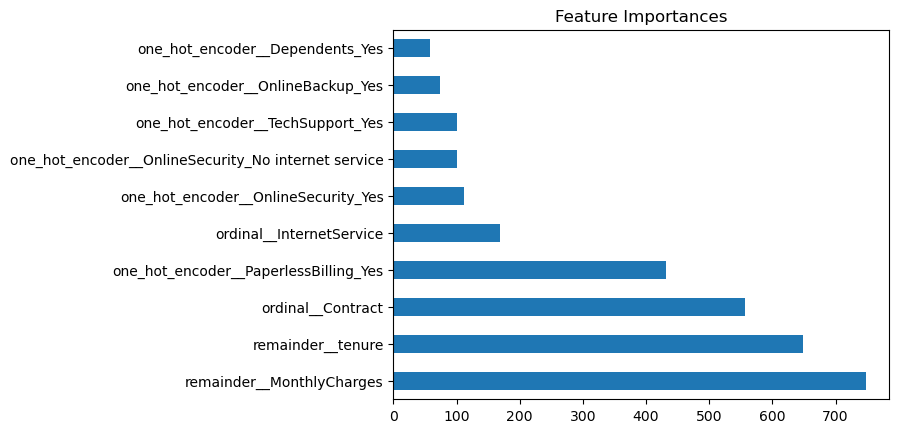

In [212]:
coef1 = pd.Series(best_lgbm['algo'].feature_importances_, list_name).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Terlihat bahwa ternyata untuk model LightGBM kita, fitur/kolom `MonthlyCharges` adalah yang paling penting, kemudian diikuti dengan `tenure`, `Contract` dan `PaperlessBilling`.

Hal ini sedikit berbeda dengan model AdaBoost kita sebelumnya, dimana fitur yang pentingnya hanya `tenure`, `MonthlyCharges`, dan `InternetService`

#### SHAPLEY VALUE OF EXPLANATIONS (SHAP)

In [213]:
trans_resample = Pipeline([
    ('prep', transformer),
    ('resample', resample)
])

X_train_over, y_train_over = trans_resample.fit_resample(X_train, y_train)

In [214]:
best_lgbm['algo']

LGBMClassifier(learning_rate=0.01, max_depth=6, random_state=0,
               scale_pos_weight=5)

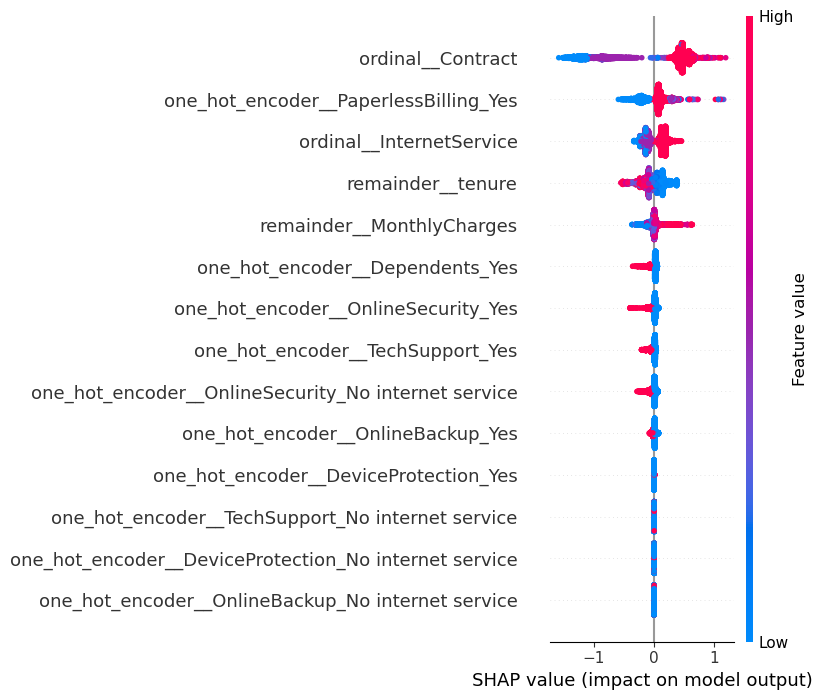

In [224]:
import shap

explainer = shap.TreeExplainer(best_lgbm['algo'])
shap_values = explainer.shap_values(X_train_over)

shap.summary_plot(shap_values, X_train_over, feature_names = list_name)


In [225]:
ordinal_mapping

[{'col': 'InternetService',
  'mapping': None           0
  Fiber optic    3
  DSL            2
  No             1
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'Contract',
  'mapping': None              0
  Month-to-month    3
  One year          2
  Two year          1
  dtype: int64,
  'data_type': dtype('O')}]

Berdasarkan SHAP value, kita dapat melihat bahwa fitur yang paling penting diantaranya:
- `Contract`
- `PaperlessBilling`
- `InternetService`
- `Tenure`
- `MonthlyCharges`

Hal ini cukup berbeda dengan hasil berdasarkan feature importance

**Interpretasi**

- Pelanggan dengan Contract Month-to-month (warna merah - 3), cenderung memiliki kemungkinan Churn yang lebih tinggi. Sedangkan semakin panjang Contract One-year (warna ungu - 2) dan Two-year (warna biru - 1), maka semakin besar kemungkinan untuk Not Churn.
- PaperlessBilling (warna merah - 1) menunjukkan bahwa pelanggan yang memilih tagihan digital lebih mungkin untuk Churn dibandingkan mereka yang tidak memilih layanan ini.
- Pelanggan dengan InternetService Fiber optic (warna merah - 3), cenderung memiliki kemungkinan Churn yang lebih tinggi dibandingkan dengan pelanggan yang menggunakan InternetService DSL atau No.
- Semakin pendek tenure (warna biru), semakin besar kemungkinan pelanggan untuk Churn.
- Semakin tinggi MonthlyCharges (warna merah), semakin besar kemungkinan pelanggan untuk Churn.

#### SHAPLEY VALUE OF EXPLANATIONS (SHAP) PER OBSERVATION FEATURE

In [226]:
# Start js (must have)
shap.initjs()

In [227]:
def shap_plot(j,model,S):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)[1]
    p = shap.force_plot(explainerModel.expected_value[1], shap_values_Model[j], S.iloc[[j]])
    return(p)

Mari kita coba observasi  ke 2 data dari dataset, untuk mempelajari bagaimana setiap fitur berkontribusi untuk memprediksi target berdasarkan skornya. Mari kita uji pada indeks ke 0 dan 4

In [228]:
X_test_df = pd.DataFrame(best_lgbm[0].transform(X_test), columns=list_name)
X_test_df.iloc[[0,4]]

,one_hot_encoder__Dependents_Yes,one_hot_encoder__OnlineSecurity_No internet service,one_hot_encoder__OnlineSecurity_Yes,one_hot_encoder__OnlineBackup_No internet service,one_hot_encoder__OnlineBackup_Yes,one_hot_encoder__DeviceProtection_No internet service,one_hot_encoder__DeviceProtection_Yes,one_hot_encoder__TechSupport_No internet service,one_hot_encoder__TechSupport_Yes,one_hot_encoder__PaperlessBilling_Yes,ordinal__InternetService,ordinal__Contract,remainder__tenure,remainder__MonthlyCharges
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,62.0,115.55
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,49.0,103.70


In [229]:
#target 
y_test.iloc[[0,4]]

1654    0
2668    1
Name: Churn, dtype: int32

In [250]:
import shap

def shap_plot(row_index, model, X):
    """
    Plot SHAP values untuk satu instance tertentu.

    Parameters:
    - row_index: indeks baris dari X yang ingin divisualisasikan
    - model: model machine learning (kompatibel dengan SHAP TreeExplainer)
    - X: DataFrame yang berisi data input untuk model
    """
    # Inisialisasi SHAP Explainer
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    
    # Jika shap_values adalah list, ambil elemen untuk kelas positif (1)
    if isinstance(shap_values, list):
        shap_values_class = shap_values[1]  # Untuk kelas positif
        expected_value = explainer.expected_value[1]  # Nilai ekspektasi untuk kelas positif
    else:
        shap_values_class = shap_values  # Untuk model multiclass atau regresi
        expected_value = explainer.expected_value
    
    # Plot SHAP force plot untuk instance tertentu
    shap.force_plot(
        expected_value,
        shap_values_class[row_index, :],
        X.iloc[row_index, :],
        matplotlib=True
    )


The prediction must predict this customer is: Not Churn from y_test


c:\Users\Rafi Arya\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray



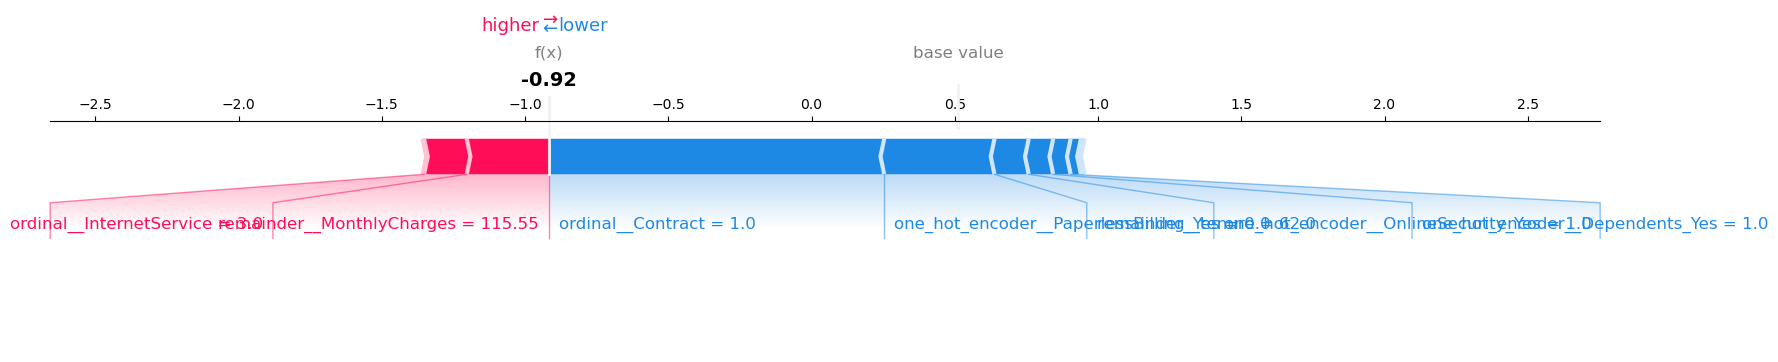

In [251]:
# Pastikan akses ke y_test tetap benar
is_churn = y_test.iloc[0] == 1
print(f"The prediction must predict this customer is: {'Churn' if is_churn else 'Not Churn'} from y_test")

# Panggil fungsi shap_plot
shap_plot(0, best_lgbm['algo'], X_test_df)


Baseline valuenya sangat mendekati 0.5. Pelanggan dengan index 0 memiliki risiko terprediksi yang lebih rendah sebesar -0.92. `Contract` Two year, tidak menggunakan `PaperlessBilling`, penggunaan `OnlineSecurity` menurunkan prediksi risiko Churn. `MonthlyCharges`=115.5 dan `InternetService`nya menggunakan Fiber optic menaikkan risiko. 

Model LightGBM memprediksi pelanggan dengan index 0 sebagai `Not Churn` karena **output value < 0**.

The prediction must predict this passenger is: Churn from y_test


c:\Users\Rafi Arya\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray



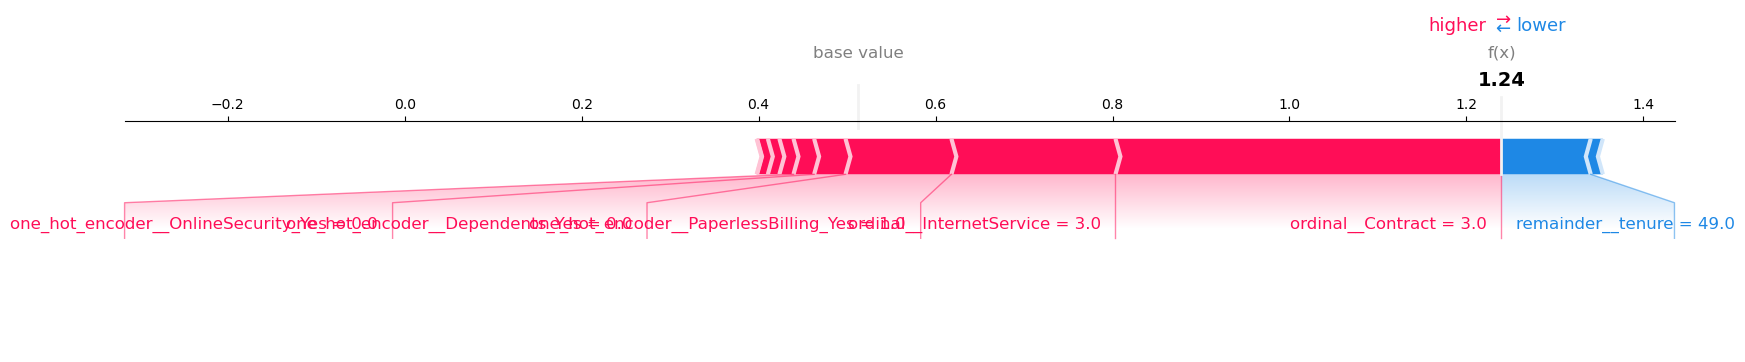

In [240]:
# Lets compare with the real result
print(f"The prediction must predict this passenger is: {('Churn' if y_test.iloc[4] == 1 else 'Not Churn')} from y_test")

shap_plot(4,best_lgbm['algo'],X_test_df)

Pelanggan dengan index 4 memiliki risiko terprediksi yang lebih tinggi sebesar 1.24. Risiko Churn meningkat karena pengaruh  `Contract`nya Month-to-month, `MonthlyCharges`=103.7 dan `InternetService`nya menggunakan Fiber optic, sedangkan `tenure` = 49 mengurangi risiko. 

Model LightGBM memprediksi pelanggan dengan index 4 sebagai `Churn` karena **output value > 0**.

#### CONFUSION MATRIX

<Axes: >

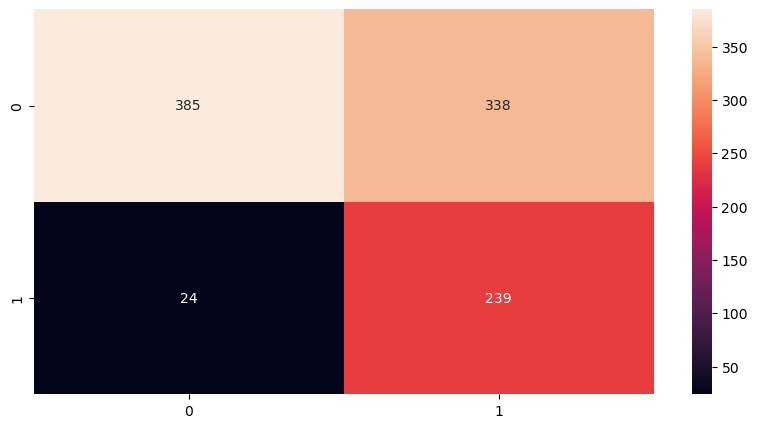

In [252]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_best_lgbm), annot=True, fmt=".0f")

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model LightGBM yang telah kita buat didapati:
- Jumlah pelanggan yang aktualnya churn dan diprediksi akan churn (True Positive) : 239 orang
- Jumlah pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn (False Negative) : 24 orang
- Jumlah pelanggan yang aktualnya tidak churn dan diprediksi tidak akan churn (True Negative) : 385 orang
- Jumlah pelanggan yang aktualnya tidak churn tetapi diprediksi akan churn (False Positive) : 338 orang
- Jumlah pelanggan yang diprediksi akan churn sebanyak 338 + 239 = 577 orang
- Jumlah pelanggan yang diprediksi tidak akan churn sebanyak 385 + 24 = 409 orang

In [253]:
# score
print('Recall:', recall_score(y_test, y_pred_best_lgbm))
print('Precision:', precision_score(y_test, y_pred_best_lgbm))
print('F2 score:', fbeta_score(y_test, y_pred_best_lgbm, beta=2))
print('Accuracy:', accuracy_score(y_test, y_pred_best_lgbm))

Recall: 0.908745247148289
Precision: 0.41421143847487
F2 score: 0.7335788827501535
Accuracy: 0.6328600405679513


**Recall**

Nilai recall 90.87% artinya, dari total pelanggan yang aslinya churn (263 orang), 90.87%-nya berhasil diprediksi dengan benar (234 orang)

**Precision**

Nilai precision 41.42% artinya, dari total pelanggan yang diklasifikasikan churn (560 orang), hanya 41.42%-nya yang berhasil terprediksi dengan benar (232 orang).

**F1-score**

Nilai F2-Score didapat dari (5 * Precision * Recall) / (4 * Precision + Recall) = 5 x 41.42% x 90.87% / (4 * 41.42% + 90.87%) = 73.35%

**Accuracy**

Nilai accuracy 63.28% artinya, dari keseluruhan pelanggan yang dites (986 orang), 63.28%-nya berhasil berhasil diprediksi dengan benar (624 orang)

#### COST ESTIMATION

Berdasarkan asumsi yang telah disampaikan pada bagian Business Understanding, kita asumsikan dampak biayanya sebagai berikut :
- Biaya retensi per pelanggan --> $3.56 per bulan per pelanggan
- Asumsi persentase customer yang tetap bertahan (tidak jadi churn) akibat program retensi : 40% ([sumber](https://jungleworks.com/how-to-reduce-churn-rate-and-increase-customer-retention/))
- Biaya akibat kehilangan pelanggan (Churn) -->  $82.67 per bulan per pelanggan (total pendapatan yang hilang dan biaya Customer Acquisition Cost)

Jumlah pelanggan untuk dasar perhitungan :
- Pelanggan yang diberikan program retensi adalah seluruh pelanggan yang diprediksi akan Churn = TP + FP = 577 orang
- Pelanggan yang tetap bertahan (tidak jadi churn) akibat program retensi = 40% x TP = 40% x 239 = 95 orang
- Pelanggan yang churn = FN + TP - Pelanggan yang tetap bertahan (tidak jadi churn) akibat program retensi = 24 + 239 - 95 = 168 orang

Cost Estimation
- 577 orang x $3.56 per bulan per pelanggan + 168 orang x $82.67 per bulan per pelanggan = $15942.68 per bulan

Maka kerugiannya sekitar $15942.68 per bulan untuk 986 pelanggan.

#### COST ESTIMATION TANPA MACHINE LEARNING

Saat kita tidak menggunakan machine learning, kita tidak dapat memprediksi pelanggan yang akan Churn atau tidak. Dampaknya adalah kita cenderung untuk memberi program retensi kepada seluruh Pelanggan.

Jumlah pelanggan untuk dasar perhitungan :
- Pelanggan yang diberikan program retensi adalah seluruh pelanggan yang diprediksi akan Churn = TP + FP = 986 orang
- Pelanggan yang tetap bertahan (tidak jadi churn) akibat program retensi = 40% x TP = 40% x 263 = 105 orang
- Pelanggan yang churn = FN + TP - Pelanggan yang tetap bertahan (tidak jadi churn) akibat program retensi = 0 + 263 - 105 = 158 orang

Cost Estimation
- 986 orang x $3.56 per bulan per pelanggan + 158 orang x $82.67 per bulan per pelanggan = ($3510.16 + $13061.86)/bulan = $16572.02 per bulan

Maka kerugiannya sekitar $16572.02 per bulan untuk 986 pelanggan bila kita tidak menggunakan machine learning.



# 5. CONCLUSION & RECOMMENDATION

## CONCLUSION

- Pada kasus ini model dibuat untuk memprediksi apakah seorang *customer* akan melakukan churn atau tidak berdasarkan dari pola-pola yang ada dalam data.
- Metric utama yang digunakan adalah F2-Score, karena recall dianggap dua kali lebih penting daripada precision. Di mana kesalahan dalam memprediksi *customer* tidak churn tetapi secara aktualnya adalah churn, dianggap lebih merugikan, dibanding kesalahan saat memprediksi *customer* churn yang secara aktual tidak churn.

- Berdasarkan hasil benchmark model dan hyperparameter tuning, model terbaik adalah AdaBoostClassifier dengan nilai F2-Score 71.96% dan parameter terbaiknya adalah sebagai berikut:
    - n_estimator = 20
    - learning_rate = 0.1
- Berdasarkan pemodelan AdaBoost, fitur/kolom `tenure` adalah yang paling penting dan berpengaruh terhadap target (Churn), kemudian diikuti dengan `MonthlyCharges` dan `InternetService`.

- Interpretasi pada plot tree dari AdaBoost adalah sebagai berikut :
    - Jika nilai `contract` kecil (<= 2.5), maka kemungkinan besar data akan masuk ke kelas "Not Churn".
    - Jika nilai `contract` besar (> 2.5), maka kemungkinan besar data akan masuk ke kelas "Churn".
    <br>
    <br>

- Berdasarkan hyperparameter tuning, parameter terbaik yang dapat digunakan untuk benchmark model LightGBM adalah :
    - scale_pos_weight = 2
    - learning_rate = 0.01
    - max_depth = 4
    <br>
    <br>
- Interpretasi SHAP
    - Pelanggan dengan Contract Month-to-month (warna merah - 3), cenderung memiliki kemungkinan Churn yang lebih tinggi. Sedangkan semakin panjang Contract One-year (warna ungu - 2) dan Two-year (warna biru - 1), maka semakin besar kemungkinan untuk Not Churn.
    - PaperlessBilling (warna merah - 1) menunjukkan bahwa pelanggan yang memilih tagihan digital lebih mungkin untuk Churn dibandingkan mereka yang tidak memilih layanan ini.
    - Pelanggan dengan InternetService Fiber optic (warna merah - 3), cenderung memiliki kemungkinan Churn yang lebih tinggi dibandingkan dengan pelanggan yang menggunakan InternetService DSL atau No.
    - Semakin pendek tenure (warna biru), semakin besar kemungkinan pelanggan untuk Churn.
    - Semakin tinggi MonthlyCharges (warna merah), semakin besar kemungkinan pelanggan untuk Churn.
    <br>
    <br>

- Berdasarkan contoh perhitungan biaya :
    - Potensi kerugian yang mungkin didapat tanpa adanya penerapan machine learning diperkirakan sebesar : $16572.02 per bulan untuk 986 pelanggan
    - Potensi kerugian yang mungkin didapat dengan menerapkan model AdaBoost yang telah dibuat diperkirakan sebesar : $16246.85 per bulan untuk 986 pelanggan
    - Potensi kerugian yang mungkin didapat dengan menerapkan model LightGBM yang telah dibuat diperkirakan sebesar : $15942.68 per bulan untuk 986 pelanggan.
    <br>
    <br>
- Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model kita, maka perusahaan dapat menghemat sebesar :
    - Dengan Model Decision Tree : $ 325.17 per bulan untuk 986 pelanggan.
    - Dengan Model LightGBM : $ 629.34 per bulan untuk 986 pelanggan.

**Model Limitation**

Kita harus berhati-hati ketika melakukan interpretasi di luar interval amatan independen variabel.

Model ini hanya berlaku pada rentang data yang digunakan pada pemodelan ini yaitu :

* `tenure` antara 0 sampai dengan 72 bulan 
* `MonthlyCharges` antara 18.8 sampai dengan 118.65
* `Contract` dalam jangka Month-to-month, One year, dan Two Year
* `InternetService` berupa 'DSL', 'Fiber Optic' dan 'No'
* `Dependent, Paperless Billing` dengan nilai 'Yes' atau 'No'
* `OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport` berisi pilihan 'Yes', 'No' atau 'No internet service'.



Pada kasus ini, analisis dan hasil prediksi dari model yang telah dibuat tidak valid untuk :
* `tenure` lebih besar dari 72 bulan 
* `MonthlyCharges` kurang dari 18.8 atau lebih besar dari 118.65
* Jenis `Contract` selain Month-to-month, One year, dan Two Year
* `InternetService` selain 'DSL', 'Fiber Optic' dan 'No'
* `Dependent, Paperless Billing` dengan nilai selain 'Yes' atau 'No'
* `OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport` berisi pilihan selain 'Yes', 'No' atau 'No internet service'.

## RECOMMENDATION

- Membuat Customer Loyalty Program yang mendorong pelanggan agar tetap bertahan dan memiliki waktu `tenure` yang panjang. Bentuk program bisa berupa pemberian reward yang besarannya disesuaikan dengan masa `tenure`. Semakin panjang `tenure`, semakin besar reward yang bisa didapat, sehingga mendorong pelanggan untuk memiliki `tenure` yang lebih panjang.
- Memberikan diskon/potongan harga `MonthlyCharges` bagi pegawai yang terindikasi/diprediksi akan churn, khususnya untuk pelanggan yang memiliki `MonthlyCharges`yang tinggi.
- Secara berkala melakukan survey kepuasan pelanggan untuk mengetahui kualitas layanan yang telah diberikan dan memperbaiki jika ada reviu yang negatif.

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi diantaranya:
- Menambahkan fitur-fitur atau kolom baru yang berisi tingkat kepuasan pelanggan untuk masing-masing layanan, sehingga dapat diketahui lebih lanjut apakah churn disebabkan oleh kualitas layanan yang buruk atau tidak.
- Menambahkan fitur-fitur atau kolom baru yang berisi durasi atau biaya penggunaan produk-produk yang ada seperti panggilan suara, SMS, dan internet. Sehingga perusahaan dapat melakukan segmentasi pelanggan untuk menentukan jenis produk yang paling sesuai untuk ditawarkan.
- Mencoba algorithm ML dan hyperparameter tuning yang berbeda (misal algoritma Logistic Regression, CatBoost, etc) serta menggunakan teknik oversampling yang berbeda selain SMOTENC. 

#### SAVE FINAL MODEL

In [254]:
import pickle

**AdaBoost**

In [255]:
# fit
best_ada.fit(X, y)

# save with pickle
pickle.dump(best_ada, open('best_model_decisiontree.sav', 'wb'))

c:\Users\Rafi Arya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



**LightGBM**

In [256]:
# fit
best_lgbm.fit(X, y)

# save with pickle
pickle.dump(best_lgbm, open('best_model_lightgbm.sav', 'wb'))

[LightGBM] [Info] Number of positive: 3614, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1073
[LightGBM] [Info] Number of data points in the train set: 7228, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
